# What are the keys to make wines with great customer satisfactions

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)


* [RunThis](#Run)
* [Connect to data](#Connect)
* [Run Model](#runmodel)


## Introduction: Business Problem <a name="introduction"></a>

**1.Introduction**

**1.1.Background**

Wine Enthusiast Magazine, was founded in 1988, brings consumers vital information on the world of wine, with hundreds of wine reviews in every issue. Wine Enthusiast Magazine is an indispensable guide to the latest wine trends, ratings and reviews. With a readership of 800,000 consumers worldwide, the magazine has grown to become the world’s largest periodical for wine and spirits. The magazine's website hosts a database of wine reviews, interviews food and wine pairings, beer and spirits news, and other topics. This data information can bring more insights to wine companies and wineries on how to make better wines.

**1.2.Problem**

Data that might contribute to determining how to make higher rating wines must include the Customer Reviews, Geographic Location, and Customer Expectation (which is the Pricing/Branding in this case, we have assumed the customer knew how much the wine costs for each rating they give). This project aims to predict what kind of wine characteristic will tend to receive a higher rating.

**1.3.Interest**

The wineries would be very interested in this prediction in order to increase their customer rating by adjusting their pricing or creating new drinking experiences. And also this analysis may give insights to customers for making optimum buying decisions based on various factors. Last but not least, for the wine taster, you can improve your tastes by this data analysis model.

## Data <a name="data"></a>

**2.Data acquisition and cleaning**

**2.1.Data sources**

Most country,	description, designation, points, price, Geo-location, variety, winery information can be found on two Kaggle csv data-sets here and here. The data was scraped by zackthoutt (kaggle.com account name) from Wine-enthusiast during the week of June 15th, 2017 and November 22nd, 2017. The code for the scraper can be found here.

**2.2.Data Feature Selection**

There are limited information available for me to select except price and location. The 	wine review section contains a lot of useful information, however, that is in texts, I can 	not use this information directly. So the challenge for me is how to dig out more 	information from the reviews section and quantify them or tag them?
So I decide to run a statistical analysis on a sample of reviews words frequency, then 	I have a list of most frequent words appears in the review. After analyzing the keywords, I decide to pick the information related with favors, for example, Cherry, Plum, 	Oak, Berry, Spice, Apple, Pepper, Blackberry, Lemon etc. This information is subjective and quantifiable, so I decide to extract all different kind of favors our of the review, represent by ‘1’ means contains, or ‘0’ not contains.

Some of the wines may contain up to 10 favors, so I create a new feature called Complexity to sum all the favors up.Unfortunately, the vintage information is missing on most of the reviews, so I decided to not extract this vital information. The final list of information is as below:
https://docs.google.com/spreadsheets/d/1TNrwV30o32KnzjfmpNJ7fb46VHCfc-sehZp-zS-lkgU/edit?usp=sharing

**2.3.Data Cleaning**

Data recreated were combined into one big table. There were a lot of missing values from price, rating and location, I have removed those without those key information.
For the favors(keywords) sector, I used numerical value [1] or [0] to indicate weather the wine contains this favor. And also I have removed those wines with [0] Complexity, in other words, the wine dose not contains any favors/keywords from the review sector.

## Methodology <a name="methodology"></a>

**3.Methodology**

**3.1 Create and extract more information data for analysis**
    
  3.1.1 Data cleaning
  3.1.2 Attibutes creation by data clould

**3.2 The choice of model**

  3.2.1 using KNN model for massive attibutes and numerical results
  
  3.2.2 Model Evaluation

> Code: Data Collections, Cleanings And Explortory Analysis
>
> Code: Import Libraries

#### Code:Create a Word Cloud for Data Review to Pick Keywords

In [111]:
# install wordcloud
!conda install -c conda-forge wordcloud==1.4.1 --yes
# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS
print ('Wordcloud is installed and imported!')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - wordcloud==1.4.1


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    wordcloud-1.4.1            |           py36_0         324 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.7 MB

The following NEW packages will be INSTALLED:

    python_abi:      3.6-1_cp36m       conda-forge
    wordcloud:       1.4.1-py36_0      conda-forge

The following packages will be UPDATE

## Run this <a name="Run"></a>

In [112]:
#connect to my data doument csv file

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches # needed for waffle Charts
import numpy as np  # useful for many scientific computing in Pytho
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3


def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_602c60a788c1458bbbd1e7f39782182a = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='0z7hhC3T879_OETMyN4jw5ptfeHB_utN0bcFuTXHjjmd',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.ap-geo.objectstorage.service.networklayer.com')

body = client_602c60a788c1458bbbd1e7f39782182a.get_object(Bucket='pythonmachinelearningproject-donotdelete-pr-kaod0sx7e13yoo',Key='winemag-data-130k-v2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)



In [113]:
reviews = df_data_1['description'].head(105000).to_string()
stopwords = set(STOPWORDS)

# instantiate a word cloud object
wine_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

#remove unwanted keywords

stopwords.add('juicy'); stopwords.add('ripe');stopwords.add('flavor');stopwords.add('blend');stopwords.add('light');stopwords.add('opens');stopwords.add('bright');
stopwords.add('aromas');stopwords.add('nose');stopwords.add('dark');stopwords.add('rich');stopwords.add('red');stopwords.add('fresh');stopwords.add('black');stopwords.add('full');
stopwords.add('note');stopwords.add('fruit');stopwords.add('soft');stopwords.add('open');stopwords.add('notes');stopwords.add('made');stopwords.add('white');stopwords.add('vineyard');
stopwords.add('fruity');stopwords.add('flavors');stopwords.add('offer');stopwords.add('earthy');stopwords.add('show');stopwords.add('offers');stopwords.add('dry');stopwords.add('smoothbottling');
stopwords.add('hint');stopwords.add('shows');stopwords.add('cabernet');stopwords.add('sauvignon');stopwords.add('sweet');stopwords.add('th');stopwords.add('bodied');stopwords.add('aromatic');
stopwords.add('spicy');stopwords.add('lead');stopwords.add('come');stopwords.add('concentrated');stopwords.add('crisp');stopwords.add('dense');stopwords.add('scents');stopwords.add('aroma');
stopwords.add('smoky');stopwords.add('touch');stopwords.add('one');stopwords.add('bottling');stopwords.add('merlot');stopwords.add('hints');stopwords.add('slightly');stopwords.add('floral');
stopwords.add('savory');stopwords.add('Chardonnay');stopwords.add('delicate');stopwords.add('big');stopwords.add('intense');stopwords.add('winery');stopwords.add('estate');stopwords.add('green');
# generate the word cloud
wine_wc.generate(reviews)


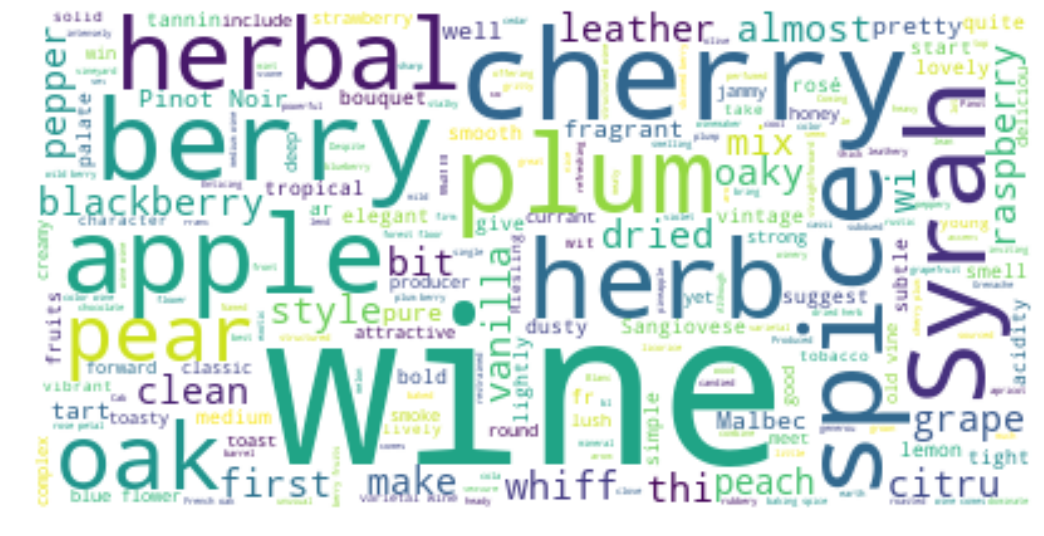

In [114]:
# display the word cloud of the most frequent flavor

fig = plt.figure()
fig.set_figwidth(18) # set width
fig.set_figheight(18) # set height
plt.imshow(wine_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

#### Code: Add Coodienate data for the geolocations

In [115]:
!pip install folium
!pip install geopandas
!pip install geopy

In [8]:
from geopy.exc import GeocoderTimedOut 
from geopy.geocoders import Nominatim 

longitude = [] 
latitude = []  
loclist = []
def findGeocode(country): 
    try: 
        geolocator = Nominatim(user_agent="your_app_name") 
          
        return geolocator.geocode(country) 
      
    except GeocoderTimedOut: 
          
        return findGeocode(country)    
    
count = 0
for i in dfloc: 
    
    if findGeocode(i) != None: 
           
        loc = findGeocode(i) 
          
        # coordinates returned from  # function is stored into  # two separate list 
        latitude.append(loc.latitude) 
        longitude.append(loc.longitude) 
       
    # if coordinate for a city not found, insert "NaN" indicating  missing value  
    else: 
        latitude.append(np.nan) 
        longitude.append(np.nan)
        
    loclist.append([i,latitude[count],longitude[count]])

    count = count + 1
print(loclist)

[['Portugal', 40.0332629, -7.8896263], ['US', 39.7837304, -100.4458825], ['Spain', 39.3262345, -4.8380649], ['Italy', 42.6384261, 12.674297], ['France', 46.603354, 1.8883335], ['Germany', 51.0834196, 10.4234469], ['Argentina', -34.9964963, -64.9672817], ['Chile', -31.7613365, -71.3187697], ['Australia', -24.7761086, 134.755], ['Austria', 47.2000338, 13.199959], ['South Africa', -28.8166236, 24.991639], ['New Zealand', -41.5000831, 172.8344077], ['Israel', 31.5313113, 34.8667654], ['Hungary', 47.1817585, 19.5060937], ['Greece', 38.9953683, 21.9877132], ['Romania', 45.9852129, 24.6859225], ['Canada', 61.0666922, -107.9917071], ['Mexico', 19.4326296, -99.1331785], ['Turkey', 38.9597594, 34.9249653], ['Czech Republic', 49.8167003, 15.4749544], ['Slovenia', 45.8133113, 14.4808369], ['Croatia', 45.5643442, 17.0118954], ['Georgia', 32.3293809, -83.1137366], ['Uruguay', -32.8755548, -56.0201525], ['England', 52.7954791, -0.5402402866174321], ['Lebanon', 33.8750629, 35.843409], ['Serbia', 44.02

In [116]:
import folium
import geopy
import geopandas
print('Folium installed and imported!')
print('GeoPy installed and imported!')
print('GepPandas installed and imported!')

Folium installed and imported!
GeoPy installed and imported!
GepPandas installed and imported!


## Connect to data and List La-Log Location <a name="Connect"></a>

In [130]:
import pandas as pd

# @hidden_cell
# The following code contains the credentials for a file in your IBM Cloud Object Storage.
# You might want to remove those credentials before you share your notebook.
credentials_2 = {
    'IAM_SERVICE_ID': 'iam-ServiceId-e152aeb4-a6c8-406e-a769-6bad1293945e',
    'IBM_API_KEY_ID': '0z7hhC3T879_OETMyN4jw5ptfeHB_utN0bcFuTXHjjmd',
    'ENDPOINT': 'https://s3.ap-geo.objectstorage.service.networklayer.com',
    'IBM_AUTH_ENDPOINT': 'https://iam.cloud.ibm.com/oidc/token',
    'BUCKET': 'pythonmachinelearningproject-donotdelete-pr-kaod0sx7e13yoo',
    'FILE': 'winemag-dataupdatedGeo.csv'
}
body = client_602c60a788c1458bbbd1e7f39782182a.get_object(Bucket='pythonmachinelearningproject-donotdelete-pr-kaod0sx7e13yoo',Key='winemag-dataupdatedGeo.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_3 = pd.read_csv(body)
df_country = df_data_3[["country","latitude","longitude"]].drop_duplicates()
df_country

,country,latitude,longitude
0,Portugal,40.033263,-7.889626
1,US,39.783730,-100.445882
4,Spain,39.326234,-4.838065
5,Italy,42.638426,12.674297
6,France,46.603354,1.888333
7,Germany,51.083420,10.423447
14,Argentina,-34.996496,-64.967282
29,Chile,-31.761336,-71.318770
52,Australia,-24.776109,134.755000
65,Austria,47.200034,13.199959


In [120]:
#Assign dataframe with respect to different Variety

df = df_data_3                                       #all the selection
df1 = df_data_3[df_data_3.variety == 'Pinot Noir']  # a selection of variety
df.head(2)

,Unnamed: 0,country,latitude,longitude,description,designation,points,price,province,region_1,...,coffee,tobacco,melon,cranberry,cinnamon,rose,blueberry,flower,cherry,Complexity
0,1,Portugal,40.033263,-7.889626,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15,Douro,NaN,...,0,0,0,0,0,0,0,0,0,1
1,2,US,39.783730,-100.445882,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14,Oregon,Willamette Valley,...,0,0,0,0,0,0,0,0,0,1


In [35]:
!pip install folium
!pip install geopandas
!pip install geopy

     |████████████████████████████████| 102kB 8.3MB/s ta 0:00:011
     |████████████████████████████████| 972kB 11.1MB/s eta 0:00:01
     |████████████████████████████████| 1.0MB 49.7MB/s eta 0:00:01
     |████████████████████████████████| 10.9MB 25.9MB/s eta 0:00:01
     |████████████████████████████████| 14.8MB 22.7MB/s eta 0:00:01


#### Show the location of the wine production country on the Global Map

In [141]:

import folium
import geopy
import geopandas
from folium import plugins

# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[0,0], zoom_start=3, tiles='Stamen Terrain')

incidents = plugins.MarkerCluster().add_to(world_map)
for lat, lng in zip( df_country['latitude'], df_country['longitude']):
        folium.Marker(
            location=[lat, lng],
            icon=None,
        ).add_to(incidents)


# display map
world_map

**3.2 Model Selection**

The aim of this analysis is to see which factors will have tremendous impacts on wine ratings. The 90% factors are manually tagged in the database, there tags are generated from reviews comments of objective information. We will choose classification algorithms like KNN, Decision Tree, etc.

In [135]:
df['points'].value_counts()

88     11393
90     10392
87     10142
89      8493
91      7830
86      7428
92      6172
85      5222
93      4177
84      3148
94      2319
83      1454
95       886
82       669
96       291
81       274
80       139
97       105
98        44
99        10
100        7
Name: points, dtype: int64

In [136]:
# notice: installing seaborn might takes a few minutes
 !pip install graphviz

### plot the rating points distribution by different country

No handles with labels found to put in legend.


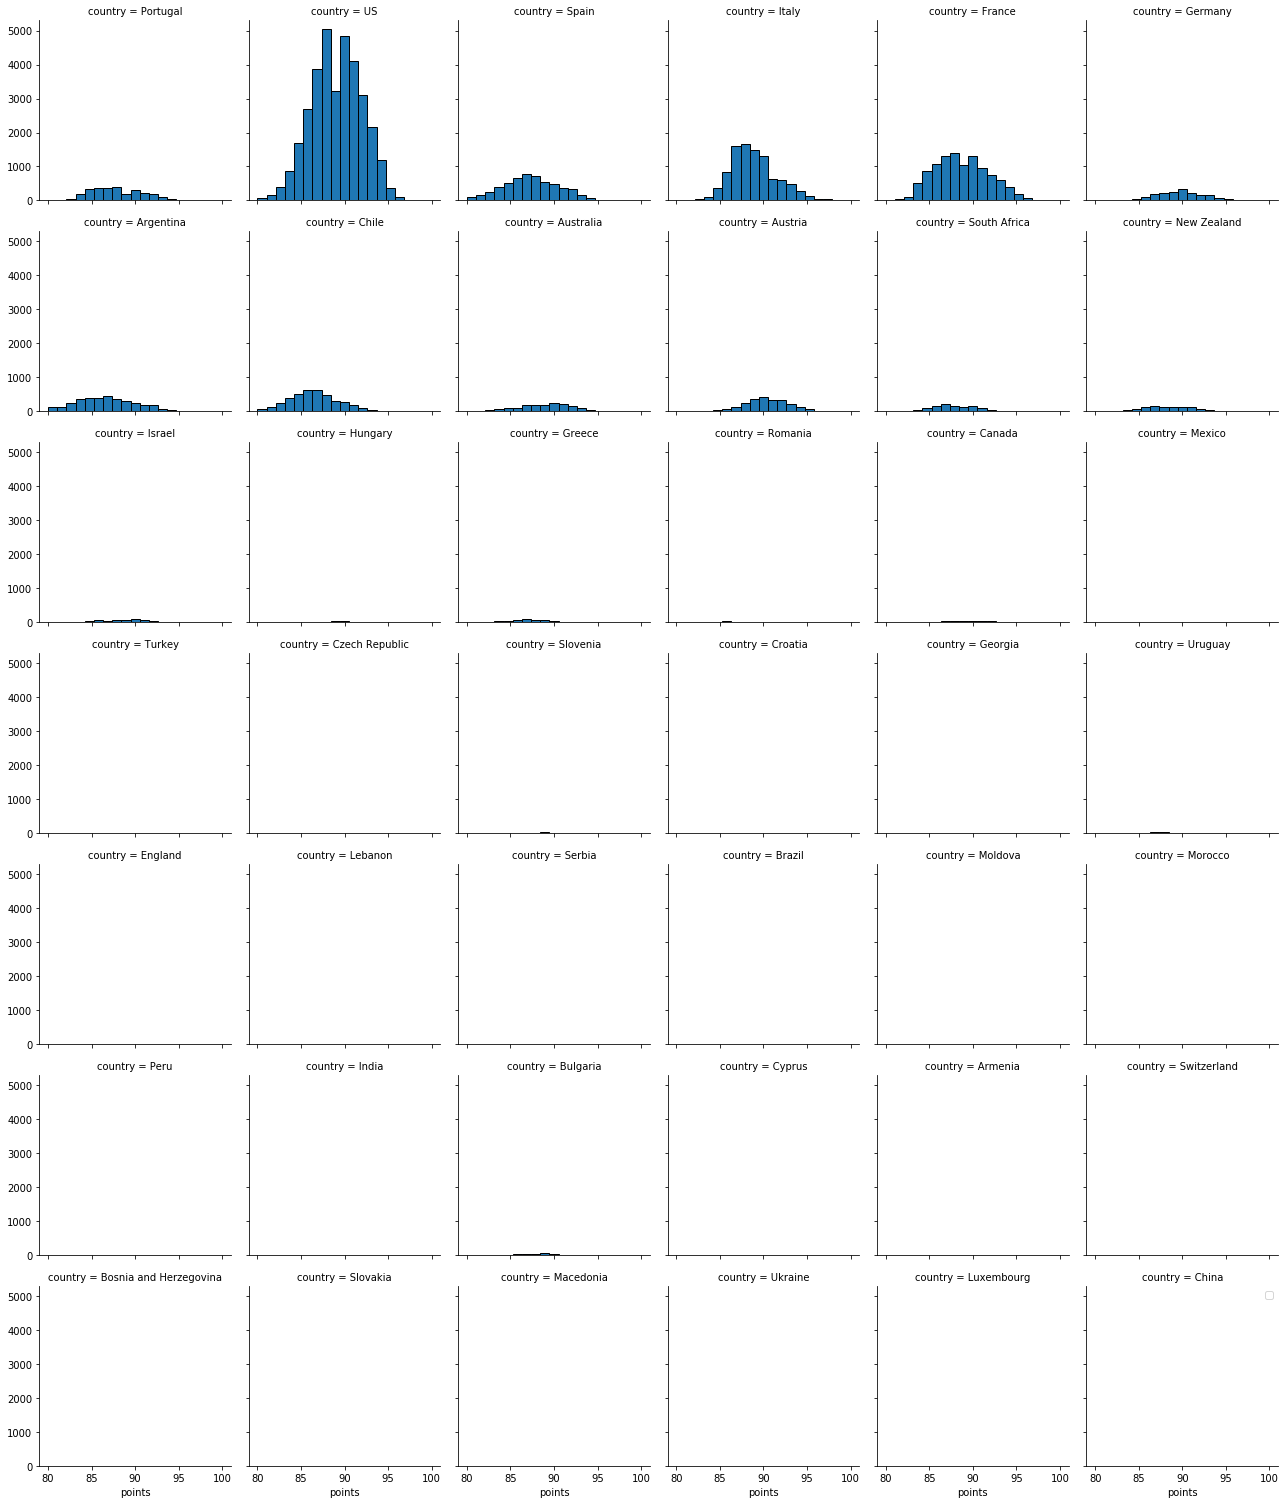

In [137]:
import seaborn as sns

bins = np.linspace(df.points.min(), df.points.max(), 20)
g = sns.FacetGrid(df, col="country", palette="Set1", col_wrap=6)
g.map(plt.hist, 'points', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

### scatter plot of price vs rating

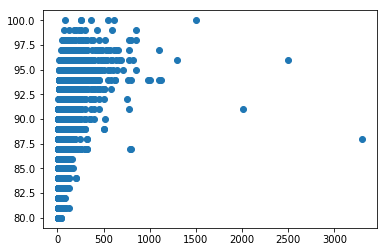

In [153]:
import numpy as np
import matplotlib.pyplot as plt
x = df.price; y = df.points; plt.scatter(x, y)
plt.show()

### scatter plot of complexity vs rating

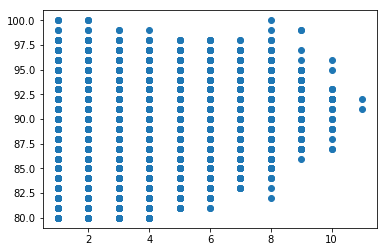

In [139]:
y = df.points; x = df.Complexity; plt.scatter(x, y)
plt.show()

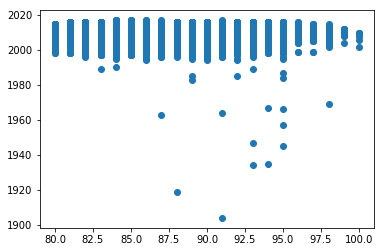

In [140]:
import numpy as np
import matplotlib.pyplot as plt
y = df.Year; x = df.points; plt.scatter(x, y)
plt.show()

In [51]:
df.columns

Index(['Unnamed: 0', 'country', 'latitude', 'longitude', 'description',
       'designation', 'points', 'price', 'province', 'region_1', 'region_2',
       'taster_name', 'taster_twitter_handle', 'title', 'Year', 'Vintage',
       'variety', 'winery', 'Cherry', 'Plum', 'Oak', 'Berry', 'Spice', 'Apple',
       'Pepper', 'Blackberry', 'Lemon', 'Vanilla', 'Raspberry', 'pear',
       'peach', 'herb', 'tannic', 'chocolate', 'orange', 'strawberry',
       'coffee', 'tobacco', 'melon', 'cranberry', 'cinnamon', 'rose',
       'blueberry', 'flower', 'cherry', 'Complexity'],
      dtype='object')

### Features Selection

## Run model <a name="runmodel"></a>

In [99]:
Feature = df[['latitude','longitude', 'Lemon', 'Vanilla', 'Raspberry', 'pear', 'peach', 'herb', 'tannic', 'chocolate', 'orange', 'strawberry', 'coffee',
              'price', 'Year', 'Cherry', 'Plum', 'Oak', 'Berry', 'Spice', 'Apple','Pepper', 'Blackberry',  
              'tobacco', 'melon', 'cranberry', 'cinnamon', 'rose','blueberry','flower', 'cherry', 'Complexity']]
X = Feature
X[0:5]

Feature = df1[['latitude','longitude', 'Lemon', 'Vanilla', 'Raspberry', 'pear', 'peach', 'herb', 'tannic', 'chocolate', 'orange', 'strawberry', 'coffee',
              'price', 'Year', 'Cherry', 'Plum', 'Oak', 'Berry', 'Spice', 'Apple','Pepper', 'Blackberry',  
              'tobacco', 'melon', 'cranberry', 'cinnamon', 'rose','blueberry','flower', 'cherry', 'Complexity']]
X1 = Feature
X1[0:5]

Feature = df2[['latitude','longitude', 'Lemon', 'Vanilla', 'Raspberry', 'pear', 'peach', 'herb', 'tannic', 'chocolate', 'orange', 'strawberry', 'coffee',
              'price', 'Year', 'Cherry', 'Plum', 'Oak', 'Berry', 'Spice', 'Apple','Pepper', 'Blackberry',  
              'tobacco', 'melon', 'cranberry', 'cinnamon', 'rose','blueberry','flower', 'cherry', 'Complexity']]


,latitude,longitude,Lemon,Vanilla,Raspberry,pear,peach,herb,tannic,chocolate,...,Blackberry,tobacco,melon,cranberry,cinnamon,rose,blueberry,flower,cherry,Complexity
21,39.783730,-100.445882,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
32,-31.761336,-71.318770,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,4
59,39.783730,-100.445882,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,4
112,39.783730,-100.445882,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,3
123,-31.761336,-71.318770,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,6


In [100]:
y = df['points'].values
y1 = df1['points'].values


array([87, 86, 86, 91, 88, 86, 88, 87, 89, 91, 89, 90, 86, 86, 86, 90, 90,
       83, 86, 88, 92, 85, 87, 87, 87, 88, 88, 85, 85, 85, 90, 88, 89, 89,
       89, 90, 87, 87, 86, 86, 86, 84, 84, 87, 86, 88, 88, 88, 91, 84, 85,
       91, 88, 88, 89, 90, 86, 86, 86, 88, 88, 86, 88, 90, 86, 87, 87, 87,
       85, 85, 88, 88, 88, 89, 90, 89, 87, 91, 88, 92, 88, 88, 86, 86, 86,
       90, 88, 91, 83, 88, 88, 88, 87, 87, 89, 91, 85, 91, 89, 89])

### Normalize Data

In [101]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:2]

X1= preprocessing.StandardScaler().fit(X1).transform(X1)
X1[0:2]


/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:13: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted

array([[ 0.46537309, -0.48965443, -0.05146169, -0.39901901, -0.34562399,
        -0.08315584, -0.05146169, -0.6064442 ,  0.        , -0.41138823,
        -0.07645159, -0.1824745 , -0.3120758 , -0.22016597,  0.13316772,
        -0.74615241,  1.40252795, -0.56006344, -0.94799583, -0.54050918,
        -0.09232682, -0.40079626, -0.37921847, -0.26246454, -0.05638839,
        -0.22342069, -0.21278828, -0.09232682, -0.21142844, -0.11090295,
        -0.74615241, -1.45558696],
       [-2.06930019,  0.14224297, -0.05146169, -0.39901901,  2.89331767,
        -0.08315584, -0.05146169,  1.64895633,  0.        , -0.41138823,
        -0.07645159, -0.1824745 , -0.3120758 , -0.61878754,  0.13316772,
        -0.74615241,  1.40252795, -0.56006344,  1.05485696, -0.54050918,
        -0.09232682, -0.40079626, -0.37921847, -0.26246454, -0.05638839,
        -0.22342069, -0.21278828, -0.09232682, -0.21142844, -0.11090295,
        -0.74615241,  0.45834644]])

### Classification Model


 **K Nearest Neighbor(KNN)**


In [103]:
### Train Test Split
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.2, random_state=4)
print ('Train set:', X1_train.shape,  y1_train.shape)
print ('Test set:', X1_test.shape,  y1_test.shape)


Train set: (64476, 32) (64476,)
Test set: (16119, 32) (16119,)
Train set: (6888, 32) (6888,)
Test set: (1723, 32) (1723,)
Train set: (4600, 32) (4600,)
Test set: (1151, 32) (1151,)
Train set: (5524, 32) (5524,)
Test set: (1381, 32) (1381,)
Train set: (2294, 32) (2294,)
Test set: (574, 32) (574,)
Train set: (1514, 32) (1514,)
Test set: (379, 32) (379,)


In [104]:
from sklearn.neighbors import KNeighborsClassifier

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

#####################  1   ##########################

Ks1 = 10
mean_acc1 = np.zeros((Ks-1))
std_acc1 = np.zeros((Ks-1))
ConfustionMx1 = [];

for n in range(1,Ks1):
    
    #Train Model and Predict  
    neigh1 = KNeighborsClassifier(n_neighbors = n).fit(X1_train,y1_train)
    yhat1=neigh1.predict(X1_test)
    mean_acc1[n-1] = metrics.accuracy_score(y1_test, yhat1)

    
    std_acc1[n-1]=np.std(yhat1==y1_test)/np.sqrt(yhat1.shape[0])

mean_acc1



array([0.23737667, 0.20313407, 0.17179338, 0.1642484 , 0.15554266,
       0.16482879, 0.16598955, 0.16715032, 0.16250725])

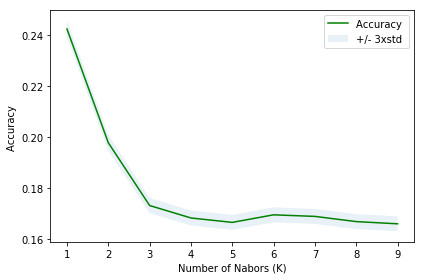

In [107]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

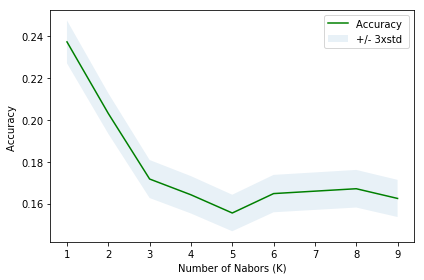

In [108]:
plt.plot(range(1,Ks1),mean_acc1,'g')
plt.fill_between(range(1,Ks1),mean_acc1 - 1 * std_acc1,mean_acc1 + 1 * std_acc1, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

### Model Evaluation

In [142]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat)

0.16589118431664496

In [148]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y1_test, yhat1)

0.1625072547881602

## Conclusion <a name="conclusion"></a>

Through this experiment, we have used labels , tags and information extracted from reviews to build a model to estimate the wine rating scores ranging from 80 to 100 for hundreds of different types of wine. Because the rating is a quantified number, so the most suitable model will be the KNN model, which compare and find the cloest charactoristics of the wine, and estimate its score. We have trained and tested for the entire group and a certain variety of wine, the models performed very poorly of only the maximium accuracy of 25% (when the K = 1). Because of the incomplete of the dataset such as GPS location parameters, vintages, wine ingradients informations, make our model less accurate, however, it is realy amazing to see the model can give a rough estimate of the wine tastes by ***NOT tasting it***.















